# Chapter 1. 나의 첫 머신러닝
- K-Neighbors 분류 모델을 기준으로 첫 모델 코드 작성

In [2]:
# 라이브러리 import
import matplotlib.pyplot as plt
import pandas as pd

# from datatable import dt, fread
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

## 데이터 import, 살펴보기

In [3]:
# dt1 = fread('~/python_practice/mldl_practice/ml/Fish.csv')
df1 = pd.read_csv('/home/user/python_practice/mldl_practice/book_practice/Fish.csv')

In [5]:
# 데이터 확인 
df1.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [6]:
# 데이터 칼럼명 확인
df1.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

## 데이터 전처리, 산점도 확인 진행
- 책에서 쓰인 데이터를 구현
- `Bream`과 `Smelt` 물고기들만 뽑아서 데이터 생성

In [ ]:
# Bream 데이터 전처리 - pandas 일반 코드
df1_bream = df1[df1['Species'] == 'Bream'] # Species가 Bream인 데이터만 추출
df1_bream['Length'] = df1_bream[['Length1', 'Length2', 'Length3']].mean(axis=1).round(1) # Length 관련 칼럼들을 바탕으로 평균 및 소숫점 둘째 자리에서 반올림
df1_bream = df1_bream[['Species', 'Weight', 'Length', 'Height', 'Width']] # 필요 칼럼만 추출

/tmp/ipykernel_50241/2768197412.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_bream['Length'] = df1_bream[['Length1', 'Length2', 'Length3']].mean(axis=1).round(1)


In [8]:
df1_bream.head()

,Species,Weight,Length,Height,Width
0,Bream,242.0,26.2,11.5200,4.0200
1,Bream,290.0,27.2,12.4800,4.3056
2,Bream,340.0,27.2,12.3778,4.6961
3,Bream,363.0,29.6,12.7300,4.4555
4,Bream,430.0,29.8,12.4440,5.1340


In [4]:
# Bream 데이터 전처리 - pandas `query`기, `assign`기능을 통해 chaining 
df1_bream = (
    df1.query("Species == 'Bream'").assign(Length=lambda x: x[['Length1','Length2', 'Length3']].mean(axis=1).round(1))
    [['Species', 'Weight', 'Length', 'Height', 'Width']])

## 산점도 확인
- 산점도(Scatterplot)은 데이터의 분포를 보기 위해 보통 확인 
- 연속형 변수에 대해 확인 가능 

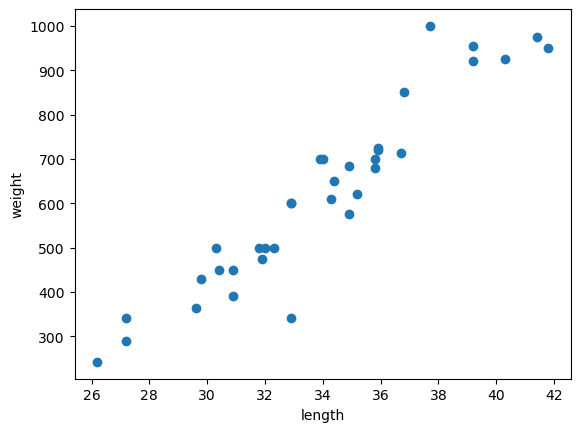

In [10]:
plt.scatter(df1_bream['Length'], df1_bream['Weight'])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [5]:
# Smelt 데이터 전처리 - pandas `query`기, `assign`기능을 통해 chaining 
df1_smelt = (
    df1.query("Species == 'Smelt'").assign(Length=lambda x: x[['Length1', 'Length2', 'Length3']].mean(axis=1).round(1))
    [['Species', 'Weight', 'Length', 'Height', 'Width']])

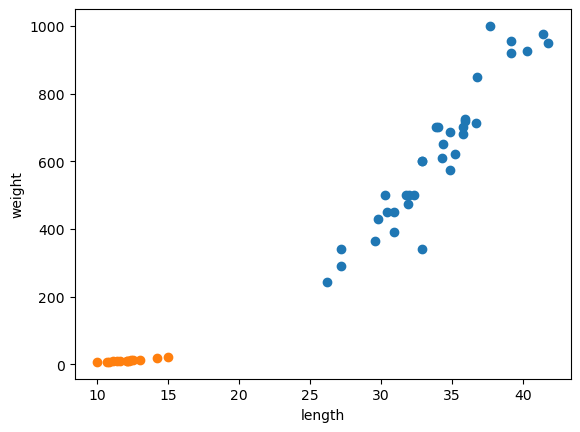

In [6]:
# 산점도 확인
plt.scatter(df1_bream['Length'], df1_bream['Weight'])
plt.scatter(df1_smelt['Length'], df1_smelt['Weight'])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 상기 산점도를 보았을 때에 Length, Weight에 따라 분류가 될 것으로 보임

# K-Neighbor 이진 분류모델 구축
- import 한 `KNeighborsClassifier`를 이용

## 이진 분류 모델용 Training data set, Test data set 만들기
- `pandas`를 이용하거나 직접 array를 생성 
- 아래와 같은 **array**나 **dataframe**형태로 데이터가 만들어지도록 data set 구축
    - dataframe 타입의 경우 feature들과 target이 각각 1차원 데이터인 arrary로 구성
```python
X = np.array([
    [5.1, 3.5, 1.4, 0.2],
    [4.9, 3.0, 1.4, 0.2],
    [6.2, 3.4, 5.4, 2.3],
    [5.9, 3.0, 5.1, 1.8],
    [6.7, 3.1, 4.4, 1.4],
    [5.6, 2.9, 3.6, 1.3]
])
y = np.array([0, 0, 1, 1, 1, 1])  # 0: setosa, 1: versicolor 등
```

```python
df = pd.DataFrame({
    'feature1': [5.1, 4.9, 6.2, 5.9, 6.7, 5.6],
    'feature2': [3.5, 3.0, 3.4, 3.0, 3.1, 2.9],
    'feature3': [1.4, 1.4, 5.4, 5.1, 4.4, 3.6],
    'feature4': [0.2, 0.2, 2.3, 1.8, 1.4, 1.3],
    'target':   [0, 0, 1, 1, 1, 1]
})

X = df.drop('target', axis=1) # target 외 모든 feature들이 들어갈 때
y = df['target']
```

In [8]:
# 오류코드
# x = pd.DataFrame({
#     'Length' : df1_bream['Length'] + df1_smelt['Length'],
#     'Weight' : df1_bream['Weight'] + df1_smelt['Weight']
# })

x = pd.concat([
    df1_bream[['Length', 'Weight']],
    df1_smelt[['Length', 'Weight']]
], ignore_index=True)

y = pd.concat([
    df1_bream['Species'], df1_smelt['Species']
], ignore_index=True)

knc = KNeighborsClassifier()

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size = 0.3,
    random_state=42,
    stratify=y
)

## 모델 학습 및 평가 진행

In [18]:
# 모델 학습 및 평가 진행
knc.fit(x_train, y_train)
knc.score(x_train, y_train)
knc.score(x_test, y_test)

1.0

In [ ]:
# 오류코드
# knc.predict[[30, 600]]

In [20]:
knc.predict([[30, 600]])

/home/user/miniforge3/envs/mldl/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Bream'], dtype=object)

- 기본 매개변수(파라미터) 값은 5

In [21]:
knc10 = KNeighborsClassifier(n_neighbors=10)
knc10.fit(x_train, y_train)
knc10.score(x_test, y_test)

1.0

In [23]:
# 트레이닝 데이터 셋보다 갯수를 많게 한 경우 - 에러
# knc48 = KNeighborsClassifier(n_neighbors=48)
# knc48.fit(x_train, y_train)
# knc48.score(x_test, y_test)

### ch1 Appendix
- 단순히 아래 처럼 더하는건 안되는건지?
```python
x = [df1_bream['Length'] + df1_smelt['Length'] + df1_bream['Weight'] + df1_smelt['Weight']]
y = df1_bream['Species'] + df1_smelt['Species']
```

1. **+** 연산
- 숫자형 시리즈끼리는 요소별 덧셈을 수행합니다.
- 길이가 다르면 오류가 나거나, 의도와 다른 결과가 나옵니다.
- 예를 들어:

```python
pd.Series([1,2]) + pd.Series([3,4])  # 결과: 4,6 (합쳐지는 게 아니라 더해짐)

```
2. [ ... ]로 감싸서 리스트를 만들면 **2차원 배열 형태가 되지 않고, 1개의 긴 1D 리스트**가 만들어집니다.

3. KNN 모델 입력으로는 **각 행이 하나의 샘플, 각 열이 하나의 피처** 형태가 필요합니다.
위 방식은 행별 결합이 아니라 단순 덧셈이 되어, 모델에 맞지 않습니다.